In [36]:
import os
import pandas as pd
import ast
import numpy as np


In [37]:
folder_path = r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\VERDANTURF TOWN'
files = os.listdir(folder_path)

In [38]:
data_frames = []  # 存储每个文件的 DataFrame

for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):  # 假设文件是以.csv结尾的
        df = pd.read_csv(file_path, delimiter=';')  # 读取文件为 DataFrame
        data_frames.append(df)  # 将 DataFrame 添加到列表中

# 合并所有 DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [39]:
merged_df

,game_status,enemy_status,state_dict,memory_coords,memory_battle_status,memory_my_sprits_status,timestamp
0,{'return_status': 0},{'enemy_count': 0},{},"{'x_coords': 16, 'y_coords': 4, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
1,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': 0},{},"{'x_coords': 16, 'y_coords': 4, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
2,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 16, 'y_coords': 4, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
3,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 16, 'y_coords': 4, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
4,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 16, 'y_coords': 4, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
...,...,...,...,...,...,...,...
2383,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'VERO ENT RERWOWN Citelas i\n', 'm...","{'x_coords': 0, 'y_coords': 10, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
2384,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'VERO ENT RERWOWN Citelas i\n', 'm...","{'x_coords': 0, 'y_coords': 10, 'map_number': ...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
2385,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'VERDANIRURF |\n“TOM he ters\n', '...","{'x_coords': 0, 'y_coords': 9, 'map_number': (...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09
2386,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'VERDANIRURF |\n“TOM he ters\n', '...","{'x_coords': 0, 'y_coords': 9, 'map_number': (...","{'player_info_not_sure_address': 3938857512, '...","{0: {'pokedex': 0, 'hp': 9, 'happiness': 0.0, ...",1.686091e+09


In [40]:
df=merged_df.copy()

In [41]:
# 将字符串转换为字典格式
df['memory_coords'] = df['memory_coords'].apply(ast.literal_eval)
df['game_status'] = df['game_status'].apply(ast.literal_eval)

# 提取 "x_coords"、"y_coords" 和 "map_number" 到新列
df['x_coords'] = df['memory_coords'].apply(lambda x: x.get('x_coords'))
df['y_coords'] = df['memory_coords'].apply(lambda x: x.get('y_coords'))
df['map_number'] = df['memory_coords'].apply(lambda x: x.get('map_number'))
df['face_dir']=df['memory_coords'].apply(lambda x: x.get('face_dir'))
df['transport']=df['memory_coords'].apply(lambda x: x.get('transport'))



In [42]:
f = df.drop(['memory_coords'], axis=1)
df = df.drop(['game_status', 'enemy_status', 'state_dict', 'memory_battle_status',"memory_my_sprits_status",'face_dir','transport'], axis=1)


In [43]:
df = df.drop(['timestamp', 'memory_coords'], axis=1)

In [44]:
# 拆分 "map_number" 列
df[['map_num_1', 'map_num_2', 'map_num_3']] = pd.DataFrame(df['map_number'].tolist())

# 删除原始的 "map_number" 列
df = df.drop(['map_number'], axis=1)


In [45]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x_coords,y_coords,map_num_1,map_num_2,map_num_3
0,16,4,1,14,50
1,15,4,1,14,50
2,14,4,1,14,50
3,13,4,1,14,50
4,12,4,1,14,50
...,...,...,...,...,...
305,14,10,1,14,50
306,11,10,1,14,50
307,11,7,1,14,50
308,11,6,1,14,50


In [46]:
# 计算数值列的统计信息
numeric_cols = ['x_coords', 'y_coords', 'map_num_1', 'map_num_2', 'map_num_3']
statistics = df[numeric_cols].describe()
print(statistics)


         x_coords    y_coords  map_num_1   map_num_2   map_num_3
count  310.000000  310.000000      310.0  310.000000  310.000000
mean    15.361290    9.051613        1.0    9.219355   61.612903
std      8.630407    4.544343        0.0    5.163691   12.013147
min      0.000000    1.000000        1.0    4.000000   50.000000
25%      8.000000    5.000000        1.0    4.000000   50.000000
50%     15.000000    9.000000        1.0   14.000000   50.000000
75%     21.000000   12.000000        1.0   14.000000   74.000000
max     33.000000   20.000000        1.0   32.000000   74.000000


In [47]:
# 计算数值列之间的相关系数
correlation = df[numeric_cols].corr()
print(correlation)


           x_coords  y_coords  map_num_1  map_num_2  map_num_3
x_coords   1.000000  0.254333        NaN  -0.500676   0.495788
y_coords   0.254333  1.000000        NaN  -0.010690   0.003213
map_num_1       NaN       NaN        NaN        NaN        NaN
map_num_2 -0.500676 -0.010690        NaN   1.000000  -0.980266
map_num_3  0.495788  0.003213        NaN  -0.980266   1.000000


In [60]:
df['new_x'] = df.apply(lambda row: row['x_coords'] -21 if row['map_num_3'] == 74 else row['x_coords'], axis=1)
df['new_y'] = df.apply(lambda row: row['y_coords'] -16 if row['map_num_3'] == 74 else row['y_coords'], axis=1)

# df['new_x']=df['x_coords']
# df['new_y'] = df['y_coords']
df
# desired_values = (1,4,74)  # 指定要筛选的值

# filtered_df = df[(df['map_num_1'] == desired_values[0]) & (df['map_num_2'] == desired_values[1])& (df['map_num_3'] == desired_values[2])]

# selected_columns = ['map_num_1', 'map_num_2', 'map_num_3']
# # filtered_df = df[selected_columns]
# # filtered_df
# filtered_df

,x_coords,y_coords,map_num_1,map_num_2,map_num_3,new_x,new_y
0,16,4,1,14,50,16,4
1,15,4,1,14,50,15,4
2,14,4,1,14,50,14,4
3,13,4,1,14,50,13,4
4,12,4,1,14,50,12,4
...,...,...,...,...,...,...,...
305,14,10,1,14,50,14,10
306,11,10,1,14,50,11,10
307,11,7,1,14,50,11,7
308,11,6,1,14,50,11,6


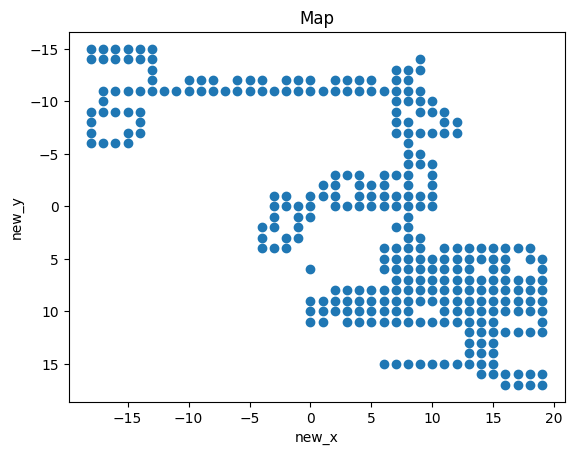

In [61]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots()

# 绘制散点图
ax.scatter(df['new_x'], df['new_y'])

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 显示图形
plt.show()


In [63]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("VERDANTURF TOWN coordinates.xlsx")

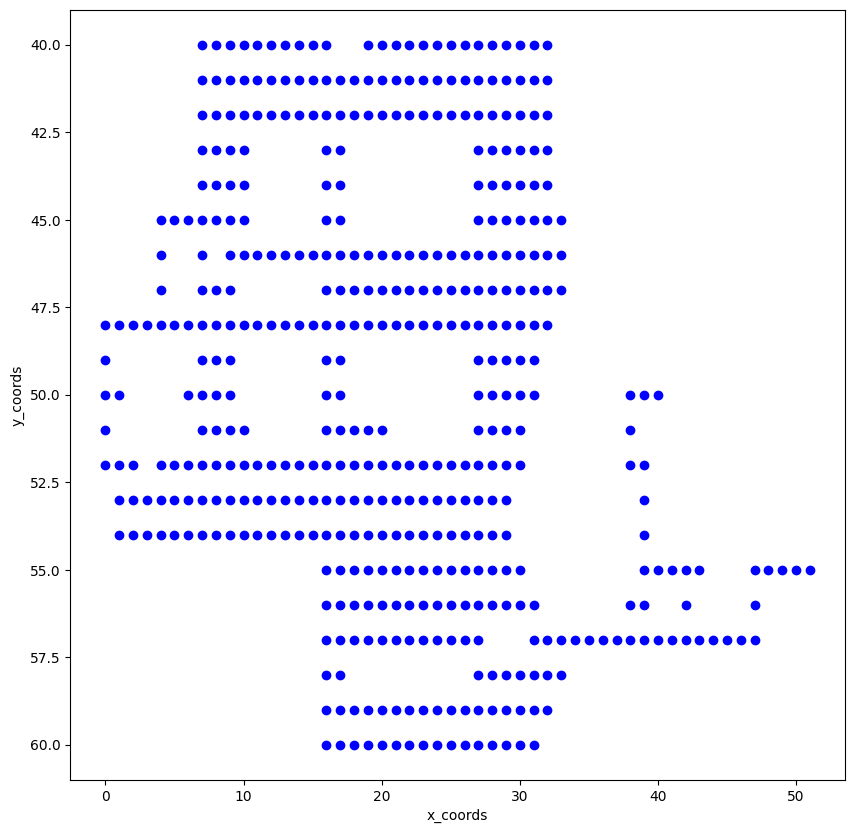

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE FRONTIER coordinates.xlsx", index_col=0)

# 反转y轴
#df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords, y_coords, color='b')
# y轴反转
plt.gca().invert_yaxis()
# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [82]:
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY coordinates.xlsx", index_col=0)
#df=pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE FRONTIER coordinates.xlsx", index_col=0)
df=pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\VERDANTURF TOWN coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df




,index,-18,-17,-16,-15,-14,-13,-12,-11,-10,...,10,11,12,13,14,15,16,17,18,19
0,-15,1.0,1.0,1.0,1.0,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-14,1.0,1.0,1.0,1.0,1,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-13,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-12,NaN,1.0,1.0,1.0,farming,farming,farming,farming,farming,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-11,NaN,1.0,1.0,1.0,farming,farming,farming,farming,farming,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-9,1.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-8,1.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-7,1.0,1.0,1.0,1.0,1,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-6,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted

,index,x_coords,mark
0,-15,-18,1.0
1,-14,-18,1.0
2,-13,-18,NaN
3,-12,-18,NaN
4,-11,-18,NaN
...,...,...,...
1249,13,19,NaN
1250,14,19,NaN
1251,15,19,NaN
1252,16,19,1.0


In [84]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted


,y_coords,x_coords,mark
0,-15,-18,1.0
1,-14,-18,1.0
2,-13,-18,NaN
3,-12,-18,NaN
4,-11,-18,NaN
...,...,...,...
1249,13,19,NaN
1250,14,19,NaN
1251,15,19,NaN
1252,16,19,1.0


In [85]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
0,-15,-18,1.0
1,-14,-18,1.0
6,-9,-18,1.0
7,-8,-18,1.0
8,-7,-18,1.0
...,...,...,...
1246,10,19,1.0
1247,11,19,1.0
1248,12,19,1.0
1252,16,19,1.0


In [86]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0         -15      -18     1
1         -14      -18     1
2          -9      -18     1
3          -8      -18     1
4          -7      -18     1
..        ...      ...   ...
332        10       19     1
333        11       19     1
334        12       19     1
335        16       19     1
336        17       19     1

[337 rows x 3 columns]


In [87]:
df_melted.to_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\VERDANTURF_TOWN_coords_tracking.csv')